# 第5章 多元线性回归

## 5.1 二元线性回归

模型:Cobb-Douglas生产函数

$\ln y_i=\ln \alpha +\beta\ln k_i +\gamma \ln l_i + \epsilon_i$

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

CD = pd.read_stata('../2_Data/Data-2e/cobb_douglas.dta')
CD.head()

,year,k,l,y,lnk,lnl,lny
0,1899,100,100,100,4.605170,4.605170,4.605170
1,1900,107,105,101,4.672829,4.653960,4.615120
2,1901,114,110,112,4.736198,4.700480,4.718499
3,1902,122,118,122,4.804021,4.770685,4.804021
4,1903,131,123,124,4.875197,4.812184,4.820282


In [4]:
# 定义变量

X = CD[['lnk','lnl']]
y = CD['lny']
X = sm.add_constant(X)

# 建立回归模型
model = sm.OLS(y,X)
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lny   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     236.1
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.04e-15
Time:                        12:15:49   Log-Likelihood:                 35.826
No. Observations:                  24   AIC:                            -65.65
Df Residuals:                      21   BIC:                            -62.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1773      0.434     -0.408      0.687      -1.080       0.726
lnk            0.2331      0.064      3.668      0.001       0.101       0.365
lnl            0.8073      0.145      5.565      0.000       0.506       1.109
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.361
Skew:                           0.583   Prob(JB):                        0.506
Kurtosis:                       2.992   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

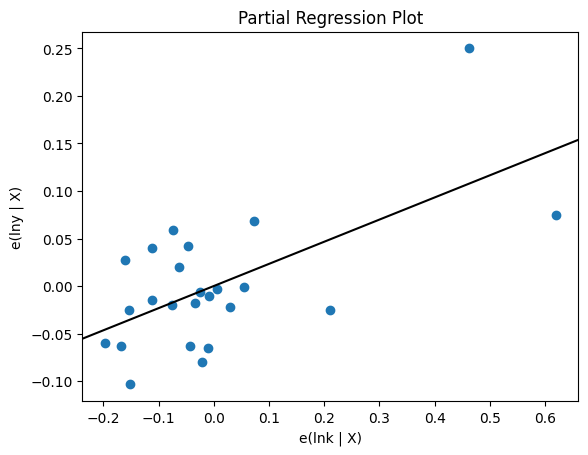

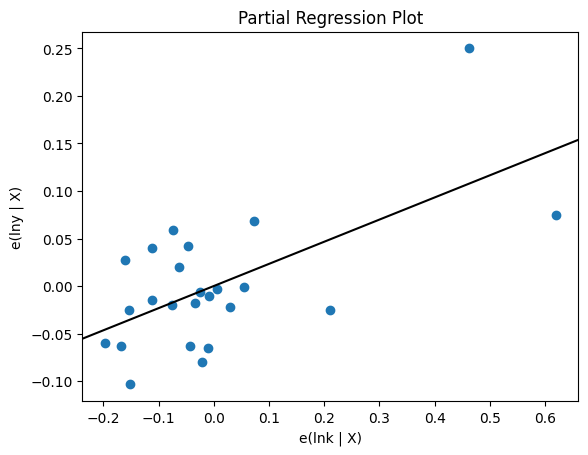

In [5]:
# sm.graphics.plot_partregress(endog='lny', 
#                              exog_i='lnk',
#                              exog_others=['lnl'],
#                              data=CD, 
#                              obs_labels=False # 不显示样本点的标签
#                              )

## 5.4 OLS的几何解释

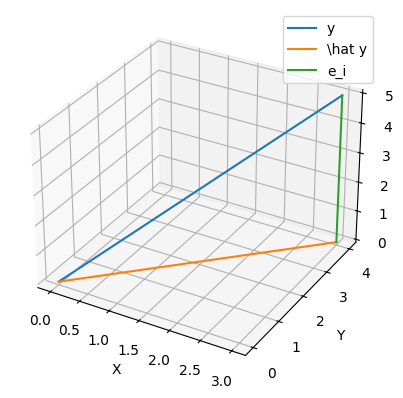

In [1]:
#借助kimi实现的代码

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义点a和点b的坐标
a = np.array([0, 0, 0])
b = np.array([3, 4, 5])

# 创建3D图形和坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制直线y
ax.plot3D([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], label='y')

# 计算直线在xy平面上的投影点
# 投影点的z坐标为0
projected_point = (b[0], b[1], 0)

# 绘制投影线$\hat y$
ax.plot3D([a[0], projected_point[0]], [a[1], projected_point[1]], [a[2], projected_point[2]], label='\hat y')

# 计算点b到投影点的垂线e
# 由于我们已经在xy平面上，垂线e的x和y坐标与投影点相同，z坐标与点b相同
e_point = (projected_point[0], projected_point[1], b[2])

# 绘制垂线e
ax.plot3D([projected_point[0], e_point[0]], [projected_point[1], e_point[1]], [projected_point[2], e_point[2]], label='e_i')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图例
ax.legend()

# 显示图形
plt.show()